<a href="https://colab.research.google.com/github/krish-hayagriva/Machine-Learning-Projects/blob/main/K_Means_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This sheet contains the program code for performing Clsutering on WWine Data using K-Means algorithim

Importing Libraries

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn as scikit

In [ ]:
pip install -U scikit-learn

Importing and reading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

wine = pd.read_csv("/content/drive/My Drive/wine.csv")


Reading the rice dataframe

In [ ]:
wine


,alcohol,malic,ash,alcanity,magn,phenols,flavnoids,nonfph,procy,cintensity,hue,od280,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
wine.isnull().sum()

alcohol       0
malic         0
ash           0
alcanity      0
magn          0
phenols       0
flavnoids     0
nonfph        0
procy         0
cintensity    0
hue           0
od280         0
proline       0
dtype: int64

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   alcohol     178 non-null    float64
 1   malic       178 non-null    float64
 2   ash         178 non-null    float64
 3   alcanity    178 non-null    float64
 4   magn        178 non-null    int64  
 5   phenols     178 non-null    float64
 6   flavnoids   178 non-null    float64
 7   nonfph      178 non-null    float64
 8   procy       178 non-null    float64
 9   cintensity  178 non-null    float64
 10  hue         178 non-null    float64
 11  od280       178 non-null    float64
 12  proline     178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
wine.describe()

,alcohol,malic,ash,alcanity,magn,phenols,flavnoids,nonfph,procy,cintensity,hue,od280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler() # defining the standard scaler
winet = pd.DataFrame(sclr.fit_transform(wine),columns =wine.columns) # transforming all features into a standardized form
(winet).head(5)

,alcohol,malic,ash,alcanity,magn,phenols,flavnoids,nonfph,procy,cintensity,hue,od280,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
corr_matrix = winet.corr()
print(corr_matrix)
type(winet)

             alcohol     malic       ash  alcanity      magn   phenols  \
alcohol     1.000000  0.094397  0.211545 -0.310235  0.270798  0.289101   
malic       0.094397  1.000000  0.164045  0.288500 -0.054575 -0.335167   
ash         0.211545  0.164045  1.000000  0.443367  0.286587  0.128980   
alcanity   -0.310235  0.288500  0.443367  1.000000 -0.083333 -0.321113   
magn        0.270798 -0.054575  0.286587 -0.083333  1.000000  0.214401   
phenols     0.289101 -0.335167  0.128980 -0.321113  0.214401  1.000000   
flavnoids   0.236815 -0.411007  0.115077 -0.351370  0.195784  0.864564   
nonfph     -0.155929  0.292977  0.186230  0.361922 -0.256294 -0.449935   
procy       0.136698 -0.220746  0.009652 -0.197327  0.236441  0.612413   
cintensity  0.546364  0.248985  0.258887  0.018732  0.199950 -0.055136   
hue        -0.071747 -0.561296 -0.074667 -0.273955  0.055398  0.433681   
od280       0.072343 -0.368710  0.003911 -0.276769  0.066004  0.699949   
proline     0.643720 -0.192011  0.2236

pandas.core.frame.DataFrame

In [ ]:
from sklearn.cluster import KMeans



In [ ]:
# applying the Elbow method to identfy the optimal number of clusters k
K = range(1,8)
ssd = []
for k in K:
  Kmeans = KMeans(n_clusters = k , init = 'k-means++',random_state = 0)
  wlabel = kmeans.labels_
  winecs = Kmeans.fit(winet)
  ssd.append(winecs.inertia_)


In [ ]:
print(wlabel)

[1 1 1 1 4 1 1 4 1 1 1 4 1 1 1 4 4 4 1 4 1 4 4 4 4 4 4 4 4 1 4 1 4 4 4 4 4
 4 5 1 1 5 1 5 1 4 1 1 1 1 1 1 1 4 1 1 1 4 1 7 7 7 7 5 7 2 5 5 7 0 7 2 2 4
 5 7 5 7 0 2 5 5 2 3 5 5 2 2 2 2 7 2 7 5 5 0 0 5 5 5 5 7 2 5 5 2 5 2 5 2 5
 5 2 2 2 2 5 2 7 5 5 2 2 5 5 5 5 2 2 2 7 3 3 3 7 3 3 3 3 3 3 3 3 3 6 3 3 3
 6 6 6 6 6 6 3 3 6 3 6 6 3 3 3 3 6 3 6 6 6 6 3 3 6 3 6 6 6 6]


In [ ]:
wineEL = pd.DataFrame({'clus_id':K, 'Sum of Squares distance': ssd})
wineEL

,clus_id,Sum of Squares distance
0,1,2314.000000
1,2,1659.007967
2,3,1278.760776
3,4,1175.705193
4,5,1113.020882
5,6,1044.078049
6,7,999.549369


In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
shil_Averagescore = metrics.silhouette_score(winet, labels = wlabel, metric = 'euclidean')
print(shil_Averagescore)

0.13581656516941268


A Silhoutte score lies between -1 and +1 . Towards +1 , the larger the value, higher is the density of clustering and towards zero or -1 indicating incorrect clustering. 

In the extant case, our Silhouttee score is positive and 013 indicating relatively correct clustering and reasonable density.

We will also now use the elbow diagram to understand the result of clustering through a visual graphical representation

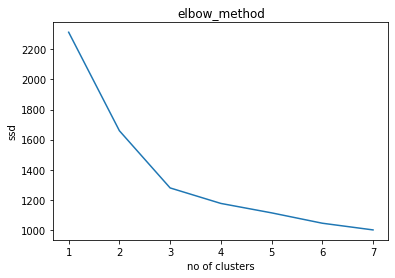

In [ ]:
plt.plot(range(1,8),ssd)
plt.title('elbow_method')
plt.xlabel('no of clusters')
plt.ylabel('ssd')
plt.show()



In [ ]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
shavg = silhouette_score(winet,wlabel)
shavg

0.13581656516941268

In [ ]:
shcore_values = pd.DataFrame(silhouette_samples(winet,wlabel))

In [ ]:
# To generate the Silhouttee score for each cluster separately to validate and choose the optimum clusters from elbow method.

cls = 8
means_lst = []
for label in range(cls):
    means_lst.append(shcore_values[wlabel== label].mean())
print(means_lst)

[0    0.260015
dtype: float64, 0    0.170075
dtype: float64, 0    0.088499
dtype: float64, 0    0.171612
dtype: float64, 0    0.121705
dtype: float64, 0    0.121521
dtype: float64, 0    0.146734
dtype: float64, 0    0.082621
dtype: float64]


As we can see from the above, after the first three clusters, the distances between the clusters and within clusters does not improve . Hence best is to segment the wine produce into three clusters

In [ ]:
# appending the cluster ID into the data frame to be a readable data
wine['Cluster-ID'] = wlabel
wine

,alcohol,malic,ash,alcanity,magn,phenols,flavnoids,nonfph,procy,cintensity,hue,od280,proline,Cluster-ID
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,6
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,6
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,6
